## 0. Import Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Import Data

In [12]:
taxi_jan_2024=pd.read_parquet('data/yellow_tripdata_2024-01.parquet')
taxi_data=pd.concat([taxi_jan_2024])

In [13]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [14]:
taxi_data.shape

(2964624, 19)

## 2. Data Exploration

In [15]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [16]:
taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID','PULocationID',
       'DOLocationID', 'payment_type',  'total_amount']]

In [17]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10


array([[<AxesSubplot:title={'center':'tpep_pickup_datetime'}>,
        <AxesSubplot:title={'center':'tpep_dropoff_datetime'}>,
        <AxesSubplot:title={'center':'passenger_count'}>],
       [<AxesSubplot:title={'center':'trip_distance'}>,
        <AxesSubplot:title={'center':'RatecodeID'}>,
        <AxesSubplot:title={'center':'PULocationID'}>],
       [<AxesSubplot:title={'center':'DOLocationID'}>,
        <AxesSubplot:title={'center':'payment_type'}>,
        <AxesSubplot:title={'center':'total_amount'}>]], dtype=object)

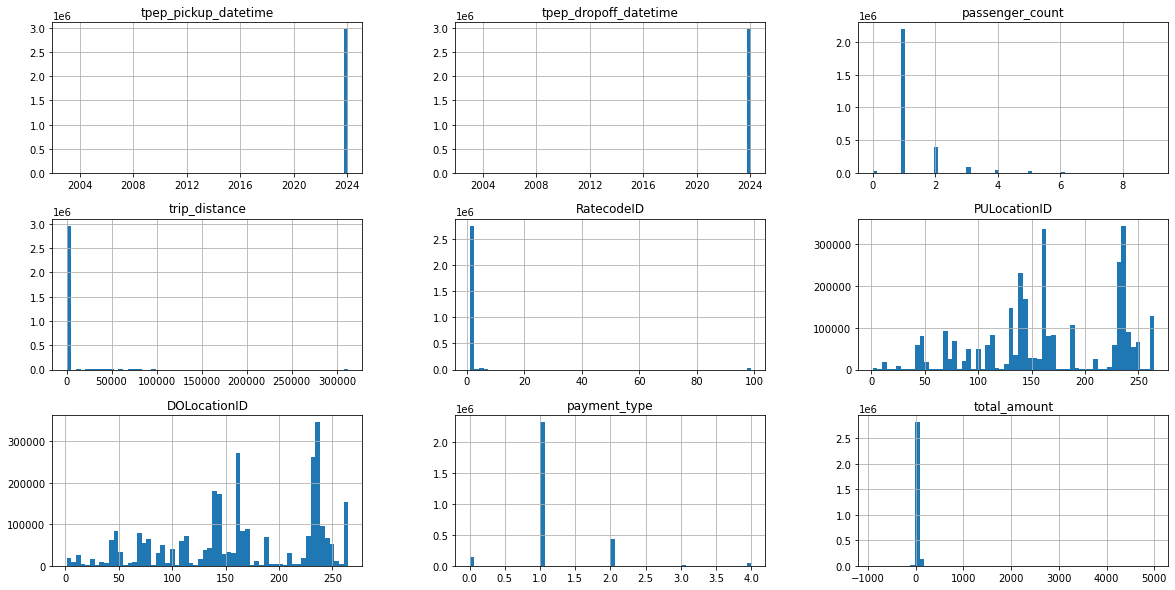

In [18]:
taxi_data.hist(figsize=(20,10),bins=60)

In [19]:
taxi_data["RatecodeID"].value_counts()

RatecodeID
1.0     2663350
2.0       98713
99.0      28663
5.0       19410
3.0        7954
4.0        6365
6.0           7
Name: count, dtype: int64

<AxesSubplot:xlabel='index', ylabel='total_amount'>

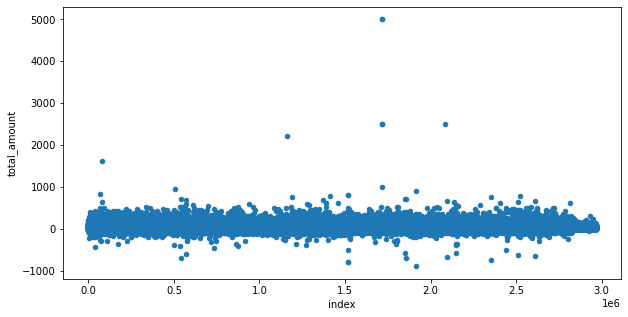

In [22]:
taxi_data.reset_index().plot(kind='scatter',x='index',y='total_amount',figsize=(10,5))

<AxesSubplot:xlabel='index', ylabel='total_amount'>

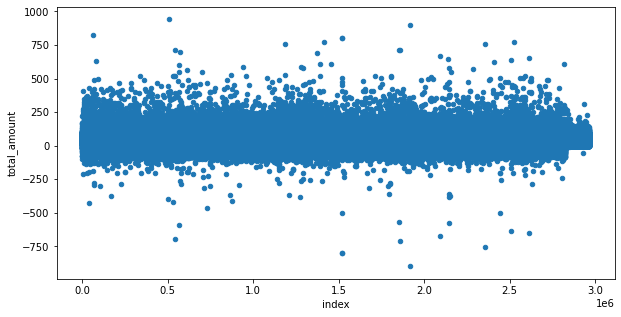

In [25]:
taxi_data[taxi_data['total_amount']<1000].reset_index().plot(
    kind='scatter',x='index',y='total_amount',figsize=(10,5))

<AxesSubplot:xlabel='index', ylabel='total_amount'>

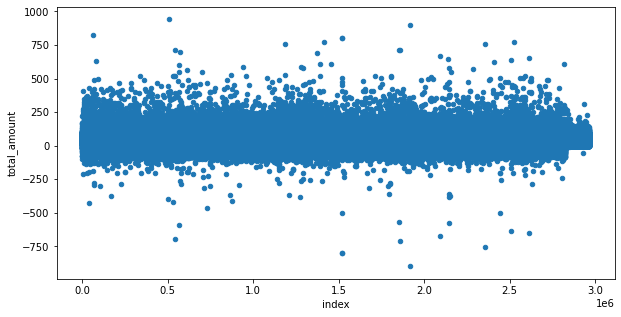

In [25]:
taxi_data[taxi_data['total_amount']<1000].reset_index().plot(
    kind='scatter',x='index',y='total_amount',figsize=(10,5))

Here we have to deal with the negative values and very high values

In [41]:
taxi_data[taxi_data['total_amount']<0].shape

(35504, 9)

<AxesSubplot:xlabel='index', ylabel='total_amount'>

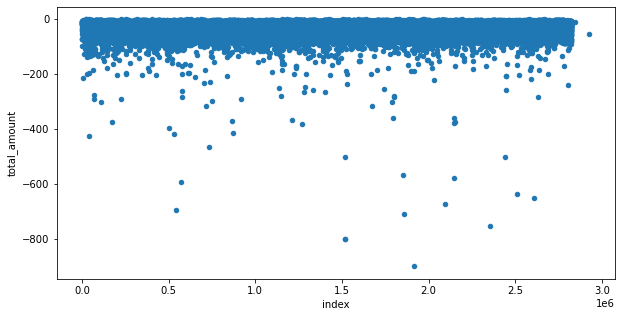

In [42]:
taxi_data[taxi_data['total_amount']<0].reset_index().plot(kind='scatter',x='index',y='total_amount',figsize=(10,5))

In [49]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

payment_type
4    21406
2     8326
3     5741
1       29
0        2
Name: count, dtype: int64

<AxesSubplot:>

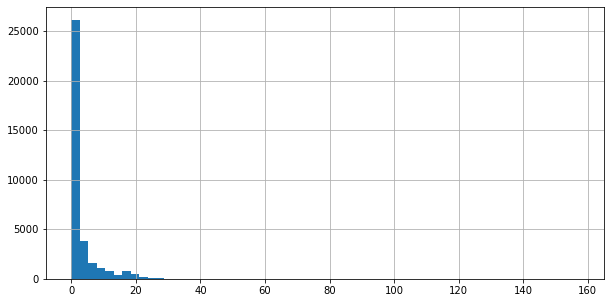

In [50]:
taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(bins=60,figsize=(10,5))

In [51]:
taxi_data[taxi_data['total_amount']==0].shape

(416, 9)

In [52]:
taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts()

payment_type
1    129
4    128
3     83
2     65
0     11
Name: count, dtype: int64

<AxesSubplot:>

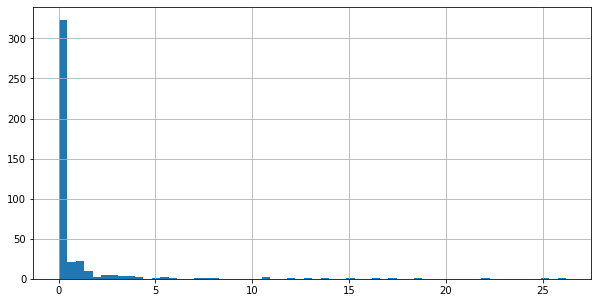

In [53]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].hist(bins=60,figsize=(10,5))

Looking into very high values

In [66]:
taxi_data[taxi_data['total_amount']>200].shape

(2005, 9)

In [67]:
taxi_data[taxi_data['total_amount']>300].shape

(525, 9)

In [59]:
taxi_data['total_amount'].mean()

26.801504770925415

We can cut the data from $300

## 3. Data Cleaning

In [69]:
taxi_data_filtered=taxi_data[(taxi_data['total_amount']>0) & (taxi_data['total_amount']<300)]
taxi_data_filtered.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10


In [70]:
taxi_data.shape

(2964624, 9)

In [71]:
taxi_data_filtered.shape

(2928177, 9)

In [73]:
taxi_data_filtered.isnull().sum()

tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          140148
trip_distance                 0
RatecodeID               140148
PULocationID                  0
DOLocationID                  0
payment_type                  0
total_amount                  0
dtype: int64

In [74]:
taxi_data_filtered['passenger_count'].mean()

1.3393425965081425

In [75]:
taxi_data_filtered['RatecodeID'].mean()

2.0790458061949857

<AxesSubplot:xlabel='index', ylabel='total_amount'>

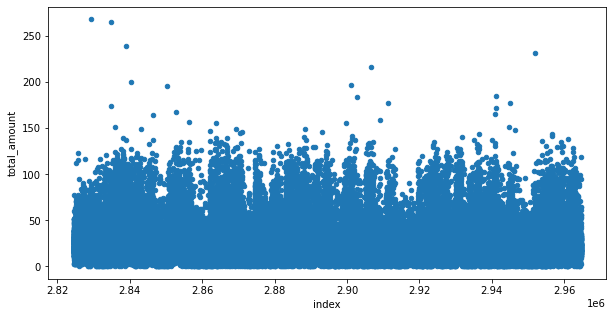

In [78]:
taxi_data_filtered[taxi_data_filtered['passenger_count'].isnull()].reset_index().plot(
    kind='scatter',x='index',y='total_amount',figsize=(10,5))

In [82]:
taxi_data_filtered=taxi_data_filtered.dropna()
taxi_data_filtered.shape

(2788029, 9)

## 4. Data Preparation

In [116]:
taxi_data_prepared=taxi_data_filtered.copy()

In [117]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
total_amount                    float64
dtype: object

In [121]:
taxi_data_prepared.loc[:,'RatecodeID']=taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared.loc[:,'PULocationID']=taxi_data_prepared['PULocationID'].astype(str)
taxi_data_prepared.loc[:,'DOLocationID']=taxi_data_prepared['DOLocationID'].astype(str)
taxi_data_prepared.loc[:,'payment_type']=taxi_data_prepared['payment_type'].astype(str)

In [122]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [123]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10


In [124]:
taxi_data_prepared['transaction_date']=pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'].dt.date)
taxi_data_prepared['transaction_year']=taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared['transaction_month']=taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared['transaction_day']=taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared['transaction_hour']=taxi_data_prepared['tpep_pickup_datetime'].dt.hour

In [125]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70,2024-01-01,2024,1,1,0
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75,2024-01-01,2024,1,1,0
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30,2024-01-01,2024,1,1,0
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00,2024-01-01,2024,1,1,0
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10,2024-01-01,2024,1,1,0


In [126]:
taxi_data_prepared['transaction_year'].unique()

array([2024, 2023, 2009, 2002], dtype=int32)

In [127]:
taxi_data_prepared[taxi_data_prepared['transaction_year']!=2024]['payment_type'].value_counts()

payment_type
1    8
2    5
3    1
Name: count, dtype: int64

In [128]:
taxi_data_prepared[taxi_data_prepared['transaction_month']!=1]['payment_type'].value_counts()

payment_type
1    10
2     3
3     1
Name: count, dtype: int64

<AxesSubplot:xlabel='transaction_year', ylabel='total_amount'>

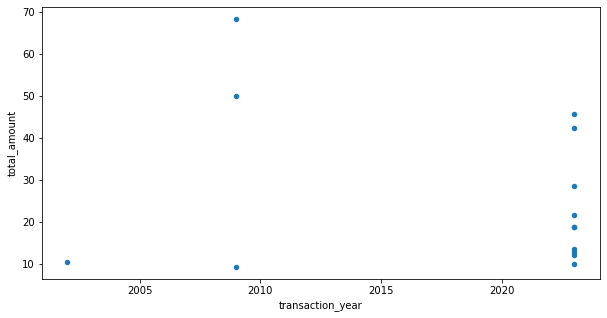

In [129]:
taxi_data_prepared[taxi_data_prepared['transaction_year']!=2024].reset_index().plot(
    kind='scatter',x='transaction_year',y='total_amount',figsize=(10,5))

In [130]:
taxi_data_prepared=taxi_data_prepared[taxi_data_prepared['transaction_year']==2024]
taxi_data_prepared=taxi_data_prepared[taxi_data_prepared['transaction_month']==1]

In [131]:
taxi_data_prepared.shape

(2788012, 14)

In [134]:
taxi_data_prepared=taxi_data_prepared[taxi_data_prepared['passenger_count']>0]
taxi_data_prepared.shape

(2756581, 14)

Noting down the categorical and numerical columns

In [135]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70,2024-01-01,2024,1,1,0
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75,2024-01-01,2024,1,1,0
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30,2024-01-01,2024,1,1,0
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00,2024-01-01,2024,1,1,0
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10,2024-01-01,2024,1,1,0


In [136]:
categorical_columns=['PULocationID','transaction_date','transaction_month','transaction_day','transaction_hour']
numerical_columns=['trip_distance','total_amount']
all_needed_columns=categorical_columns+numerical_columns

In [137]:
main_taxi_df=taxi_data_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(2756581, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,186,2024-01-01,1,1,0,1.72,22.70
1,140,2024-01-01,1,1,0,1.80,18.75
2,236,2024-01-01,1,1,0,4.70,31.30
3,79,2024-01-01,1,1,0,1.40,17.00
4,211,2024-01-01,1,1,0,0.80,16.10


Aggregating Data Points

In [162]:
taxi_grouped_by_region=main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['count_of_transactions'] = main_taxi_df.groupby(
                                                    categorical_columns).count().reset_index()['total_amount']
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()


(71871, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2024-01-01,1,1,5,0.000000,109.200000,1
1,1,2024-01-01,1,1,6,0.020000,76.000000,3
2,1,2024-01-01,1,1,13,0.000000,108.983333,3
3,1,2024-01-01,1,1,14,0.001667,85.680000,6
4,1,2024-01-01,1,1,15,0.000000,145.620000,2


<AxesSubplot:>

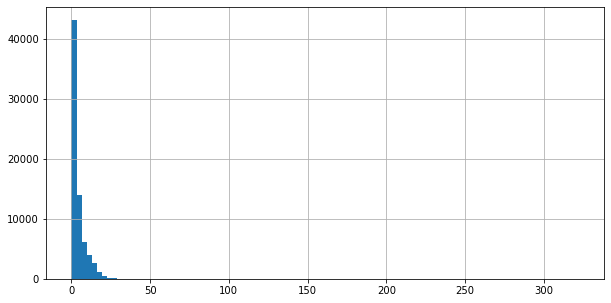

In [168]:
taxi_grouped_by_region['trip_distance'].hist(bins=100,figsize=(10,5))

<AxesSubplot:>

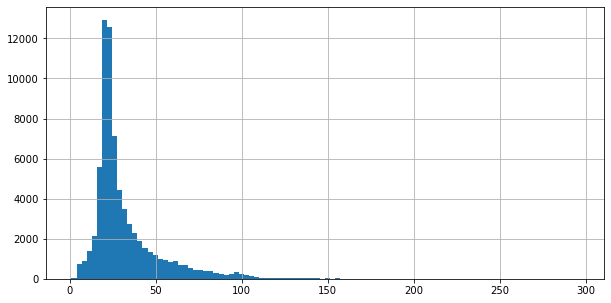

In [169]:
taxi_grouped_by_region['total_amount'].hist(bins=100,figsize=(10,5))

## 5. Bechmark Model

In [244]:
data_for_benchmark_model=taxi_grouped_by_region.copy()

In [245]:
categorical_features_benchmark=['PULocationID','transaction_month','transaction_day','transaction_hour']
input_features_benchmark=categorical_features_benchmark+['trip_distance']
target_feature_benchmark='total_amount'

### 5.1 Train-Test-Split

In [273]:
from sklearn.model_selection import train_test_split

X_bench=data_for_benchmark_model[input_features_benchmark]
y_bench=data_for_benchmark_model[target_feature_benchmark]

X_bench=pd.get_dummies(X_bench)

X_train,X_test,y_train,y_test=train_test_split(X_bench,y_bench,test_size=0.2,random_state=10)

In [274]:
X_bench.head()

,transaction_month,transaction_day,transaction_hour,trip_distance,PULocationID_1,PULocationID_10,PULocationID_100,PULocationID_101,PULocationID_102,PULocationID_105,...,PULocationID_9,PULocationID_90,PULocationID_91,PULocationID_92,PULocationID_93,PULocationID_94,PULocationID_95,PULocationID_96,PULocationID_97,PULocationID_98
0,1,1,5,0.000000,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,1,6,0.020000,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,1,13,0.000000,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,1,14,0.001667,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,1,15,0.000000,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### 5.2 Fit a model to the data

In [275]:
from sklearn.tree import DecisionTreeRegressor

tree=DecisionTreeRegressor(max_depth=10,random_state=10)
tree.fit(X_train,y_train)
tree.score(X_test,y_test)

0.6240267928755878

In [259]:
from sklearn.decomposition import PCA

pca=PCA(n_components=250,random_state=10)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

In [260]:
tree.fit(X_train_pca,y_train)
tree.score(X_test_pca,y_test)

0.5775674903119681

In [279]:
y_pred=tree.predict(X_test)

In [280]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(tree,X_bench,y_bench,cv=4)
print(score)
np.average(score)

[0.54356882 0.44701664 0.34989508 0.51086457]


0.4628362806433055

In [283]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(max_depth=100)

In [284]:
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6619500621407001

In [285]:
score1=cross_val_score(model,X_bench,y_bench,cv=4)
print(score1)
np.average(score1)

[0.5008398  0.43624356 0.29834346 0.4874946 ]


0.43073035530778403

In [287]:
from sklearn.linear_model import Ridge

lin_reg=Ridge(alpha=50,max_iter=100,tol=0.1)
lin_reg.fit(X_train,y_train)
lin_reg.score(X_test,y_test)

0.5929150060657338

In [289]:
score2=cross_val_score(lin_reg,X_bench,y_bench,cv=5)
print(score2)
np.average(score2)

[0.4028374  0.32045182 0.39856309 0.15857811 0.27903004]


0.31189209120088457

In [298]:
from sklearn.svm import SVR

model1=SVR()
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.32647912806434487